In [3]:
# Libraries are used Numpy & Pandas for data compiling and sorting mathplotlib for plotting yfinance
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import requests

In [4]:
plt.style.use('fivethirtyeight')

In [5]:
#getting the all info about the companies of NIFTY 50
df=pd.read_csv("ind_niftynext50list.csv")
df.head()

,Company Name,Industry,Symbol,Series,ISIN Code
0,ACC Ltd.,CEMENT & CEMENT PRODUCTS,ACC,EQ,INE012A01025
1,Abbott India Ltd.,PHARMA,ABBOTINDIA,EQ,INE358A01014
2,Adani Green Energy Ltd.,POWER,ADANIGREEN,EQ,INE364U01010
3,Adani Transmission Ltd.,POWER,ADANITRANS,EQ,INE931S01010
4,Alkem Laboratories Ltd.,PHARMA,ALKEM,EQ,INE540L01014


In [6]:
#Extracting the each stock's tickers name and preparing them for extracting from Yahoo finance
ps = df["Symbol"].tolist()
qt = ".NS"
luby=[x + qt for x in ps]
luby

['ACC.NS',
 'ABBOTINDIA.NS',
 'ADANIGREEN.NS',
 'ADANITRANS.NS',
 'ALKEM.NS',
 'AMBUJACEM.NS',
 'AUROPHARMA.NS',
 'DMART.NS',
 'BAJAJHLDNG.NS',
 'BANDHANBNK.NS',
 'BANKBARODA.NS',
 'BERGEPAINT.NS',
 'BIOCON.NS',
 'BOSCHLTD.NS',
 'CADILAHC.NS',
 'COLPAL.NS',
 'CONCOR.NS',
 'DLF.NS',
 'DABUR.NS',
 'GICRE.NS',
 'GODREJCP.NS',
 'HDFCAMC.NS',
 'HAVELLS.NS',
 'HINDPETRO.NS',
 'HINDZINC.NS',
 'ICICIGI.NS',
 'ICICIPRULI.NS',
 'IGL.NS',
 'INDUSTOWER.NS',
 'NAUKRI.NS',
 'INDIGO.NS',
 'LTI.NS',
 'LUPIN.NS',
 'MARICO.NS',
 'MOTHERSUMI.NS',
 'MUTHOOTFIN.NS',
 'NMDC.NS',
 'OFSS.NS',
 'PETRONET.NS',
 'PIDILITIND.NS',
 'PEL.NS',
 'PFC.NS',
 'PGHH.NS',
 'PNB.NS',
 'SBICARD.NS',
 'SIEMENS.NS',
 'TATACONSUM.NS',
 'TORNTPHARM.NS',
 'UBL.NS',
 'MCDOWELL-N.NS']

In [7]:
#Extracting the 50 columns from yahoo finance
prices = yf.download(luby, start='2020-01-01')['Adj Close'] 

[*********************100%***********************]  50 of 50 completed


In [8]:
#Normalizing the data
rs = prices.apply(np.log).diff(1)

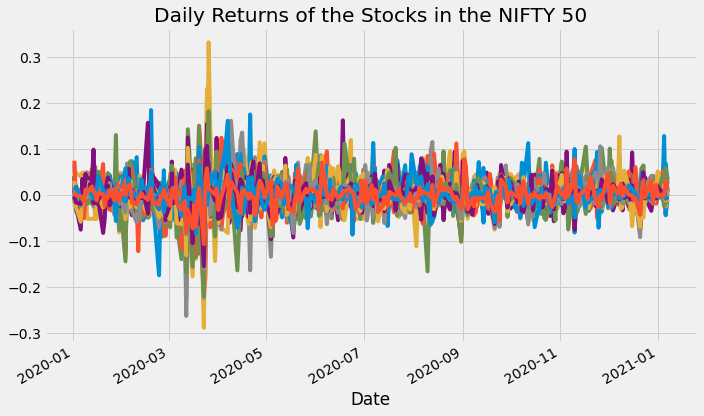

In [9]:
#Daily return of the each 50 stocks
rs.plot(legend=0, figsize=(10,6), grid=True, title='Daily Returns of the Stocks in the NIFTY 50')
plt.tight_layout()
plt.savefig('tmp.png')

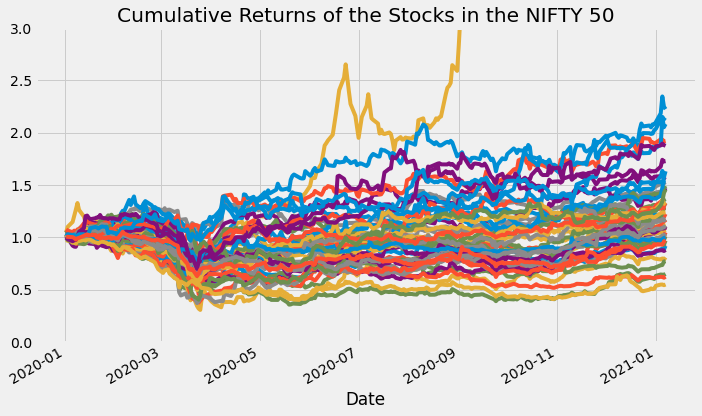

In [10]:
(rs.cumsum().apply(np.exp)).plot(legend=0, figsize=(10,6), ylim=(0,3), grid=True, title='Cumulative Returns of the Stocks in the NIFTY 50')
plt.tight_layout()
plt.savefig('tmp.png')

In [11]:
from sklearn.decomposition import PCA

In [12]:
#First component of PCA analysis 
pca = PCA(1).fit(rs.fillna(0))

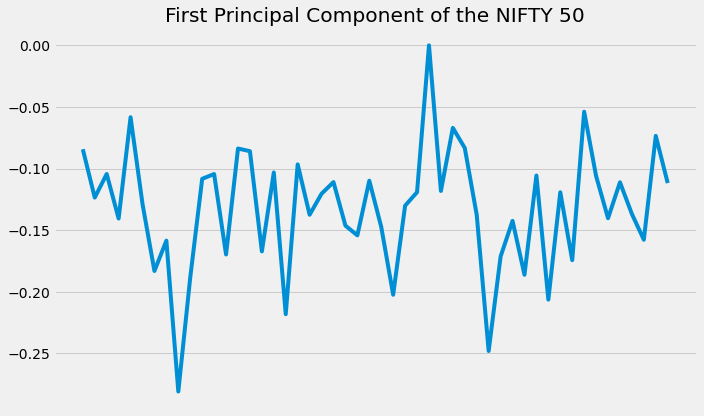

In [13]:
pc1 = pd.Series(index=rs.columns, data=pca.components_[0])

pc1.plot(figsize=(10,6), xticks=[], grid=True, title='First Principal Component of the NIFTY 50')
plt.tight_layout()
plt.savefig('tmp.png')

<AxesSubplot:xlabel='Date'>

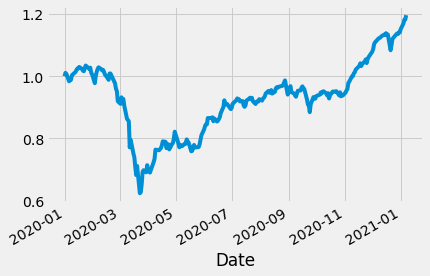

In [14]:
weights = abs(pc1)/sum(abs(pc1))
myrs = (weights*rs).sum(1)
myrs.cumsum().apply(np.exp).plot()

In [15]:
#Extracting the whole NIFTY 50 data set as a whole from yahoo finance
prices = yf.download(['^NSEI'], start='2020-01-01')['Adj Close'] 

[*********************100%***********************]  1 of 1 completed


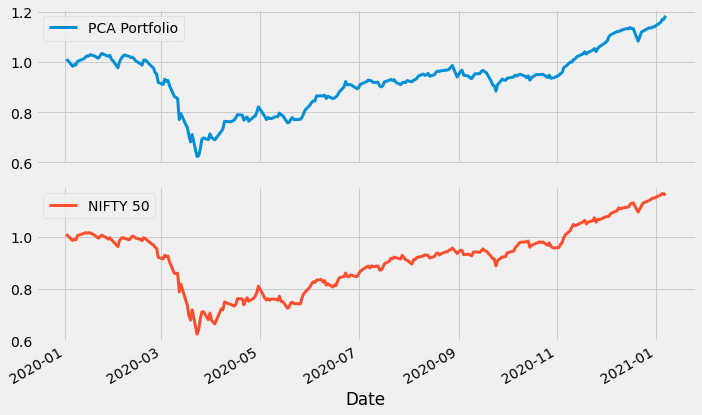

In [16]:
#Cross checking if our PCA Portfolio match with original NIFTY 50 portfolio given in Yahoo finance. The result is amazing both of the graph are almost same.
rs_df = pd.concat([myrs, prices.apply(np.log).diff(1)], 1)
rs_df.columns = ["PCA Portfolio", "NIFTY 50"]

rs_df.dropna().cumsum().apply(np.exp).plot(subplots=True, figsize=(10,6), grid=True, linewidth=3);
plt.tight_layout()
plt.savefig('tmp.png')

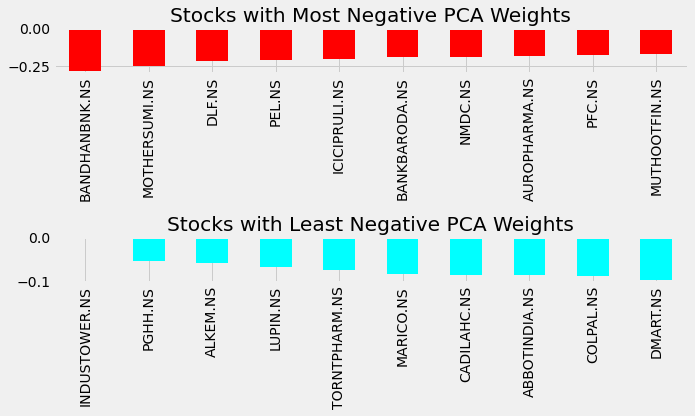

In [17]:
#Extracting the most well performed(10) and least performed(10) stocks during year 2020 
fig, ax = plt.subplots(2,1, figsize=(10,6))
pc1.nsmallest(10).plot.bar(ax=ax[0], color='red', grid=True, title='Stocks with Most Negative PCA Weights')
pc1.nlargest(10).plot.bar(ax=ax[1], color='cyan', grid=True, title='Stocks with Least Negative PCA Weights')

plt.tight_layout()
plt.savefig('tmp.png')

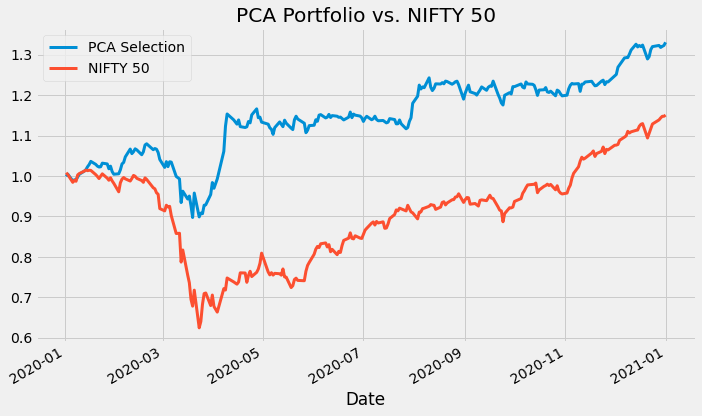

In [16]:
#modelling a winning portfolio, removing all poorly performed stocks with the most well performed stocks, but  this will practically ony work if we can go back to time.
# ws = [-1,]*10+[1,]*10
# myrs = (rs[list(pc1.nsmallest(15).index)+list(pc1.nlargest(10).index)]*ws).mean(1)
myrs = rs[pc1.nlargest(10).index].mean(1)
myrs.cumsum().apply(np.exp).plot(figsize=(15,5), grid=True, linewidth=3, title='PCA Portfolio vs. NIFTY 50')
prices['2020':].apply(np.log).diff(1).cumsum().apply(np.exp).plot(figsize=(10,6), grid=True, linewidth=3)
plt.legend(['PCA Selection', 'NIFTY 50'])

plt.tight_layout()
plt.savefig('tmp.png')